In [19]:
import random as rn
def create_random_square_matrix(n):
    matrix = []
    for i in range(n):
        row = []
        for j in range(n):
            row.append(rn.randint(-99, 99))
        matrix.append(row)
    return matrix

In [9]:
def create_random_vector(n):
    vector = []
    for _ in range(n):
        vector.append(rn.randint(-99,99))
    return vector

In [2]:
def create_identity_matrix(n):
    matrix = []
    for i in range(n):
        row = []
        for j in range(n):
            if i == j:
                row.append(1)
            else:
                row.append(0)
        matrix.append(row)
    return matrix
    

In [3]:
def vector_multiply(vector, factor):
    new_vec = []
    for num in vector:
        new_vec.append(num*factor)
    return new_vec

In [4]:
def vector_add(v1, v2):
    new_vec =[]
    for i in range(len(v1)):
        new_vec.append(v1[i]+v2[i])
    return new_vec

In [5]:
def print_matrix(m):
    for row in m:
        for digit in row:
            print(str(digit).rjust(6), end="")
        print(" ")
m = [[3,5,1], [6,8,6], [12, 26, -7]]
print_matrix(m)

     3     5     1 
     6     8     6 
    12    26    -7 


In [6]:
def lr_split(matrix):
    n = len(matrix)
    L = create_identity_matrix(n)
    R = matrix
    for i in range(0,n-1): # i Spalte
        for j in range(i+1, n):  # j Zeile
            div = R[j][i]/R[i][i]
            R[j] = vector_add(R[j],vector_multiply(R[i], -div))
            L[j][i] = div
    return L,R
L, R = lr_split([[3,5,1], [6,8,6], [12, 26, -7]])
print("L:  ")
print_matrix(L)
print("\n\nR:   ")
print_matrix(R)


L:  
     1     0     0 
   2.0     1     0 
   4.0  -3.0     1 


R:   
     3     5     1 
   0.0  -2.0   4.0 
   0.0   0.0   1.0 


In [7]:
for i in range(1, 1):
    print(i)
    

In [ ]:
def solve_with_upper(vektor, matrix):
    n = len(matrix)
    x = [0]*n
    for i in range(n-1, -1, -1):
        x[i] = vektor[i]
        for j in range(i+1,n):
            x[i] -= matrix[i][j]*x[j]
        x[i] /= matrix[i][i]
    return x

In [15]:
def solve_with_lower(vector, matrix):
    n = len(matrix)
    x = [0]*n
    for i in range(n):
        x[i] = vector[i]
        for j in range(i):
            x[i] -= matrix[i][j]*x[j]
        x[i] /= matrix[i][i]
    return x

In [17]:
def solve_matrix_vector(matrix, vector):
    l,r = lr_split(matrix)
    y = solve_with_lower(vector, l)
    x = solve_with_upper(y, r)
    return x

In [12]:
vec = create_random_vector(3)
print(vec)
print(solve_with_upper(vec, R))

[50, 99, 0]
[99.16666666666667, -49.5, 0.0]


In [16]:
vec = create_random_vector(3)
print(vec)
print(solve_with_lower(vec, L))

[-82, 78, 97]
[-82.0, 242.0, 1151.0]


In [20]:
n = 4
for i in range(10):
    m = create_random_square_matrix(n)
    print_matrix(m)
    b = create_random_vector(n)
    print("b:",b)
    x = solve_matrix_vector(m,b)
    print("x:",x)


    54    47   -54    96 
    45   -57    38    -4 
    99    65    83    39 
   -96    83   -19    88 
b: [-5, 38, 90, 50]
x: [-0.1890904176538031, -0.14726423650538872, 1.0802942624659604, 0.7340436650231301]
   -85    21    91     0 
   -58    95     1    47 
   -67   -26    26   -58 
    84   -76    91   -19 
b: [-78, 34, 10, -51]
x: [1.3740120721544777, 2.716341937616493, -0.20057312699797517, -3.0672172502470025]
   -92   -64   -17   -72 
    76    51   -20   -48 
    21    -8    86   -10 
   -11   -50    15   -89 
b: [73, 1, -97, 11]
x: [-0.38688696128214123, -0.040114277423256295, -1.0642130770837388, -0.23260365967404228]
   -85   -43   -92     0 
     8    80    -4   -52 
   -25    54    40   -12 
    46    41    77    94 
b: [-16, 18, 91, 5]
x: [-1.1989461370368995, 0.1347000771963852, 1.2186773731379552, -0.4171206233295423]
   -40    79   -74   -43 
   -22     3    54   -71 
    81    46   -30    52 
   -55   -92   -38   -12 
b: [65, 49, 69, -49]
x: [1.684620407919791, 0.0

In [ ]:
# Programmieraufgabe 1 a)
L = [[1,0,0],[-2,1,0],[4,5,1]]
R = [[2,-1,6],[0,3,9],[0,0,-2]]
b = [18,-3, 231]

def vorrueck(L,R,b):
    n = len(L)
    y = [0]*n
    for i in range(n):
        y[i] = b[i]
        for j in range(i):
            y[i] -= L[i][j]*y[j]
        y[i] /= L[i][i]

    x = [0]*n
    for i in range(n-1, -1, -1):
        x[i] = y[i]
        for j in range(i+1,n):
            x[i] -= R[i][j]*x[j]
        x[i] /= R[i][i]
    return x

x = vorrueck(L,R,b)
print(x)

[1.0, 2.0, 3.0]


In [26]:
# Programmieraufgabe 1 b)
from numpy import exceptions


def lr(matrix):
    n = len(matrix)
    L = create_identity_matrix(n)
    R = matrix
    for i in range(0,n-1): # i Spalte
        for j in range(i+1, n):  # j Zeile
            div = R[j][i]/R[i][i]
            R[j] = vector_add(R[j],vector_multiply(R[i], -div))
            L[j][i] = div
    return L,R

def multiply(A,B):
    C = []
    try:
        b_rows = len(B[0])
    except:
        b_rows = 1

    for a_line in A:
        c_line = []
        for j in range(b_rows):
            c_i = 0
            for k, a in enumerate(a_line):
                c_i += a*B[k][j]
            c_line.append(c_i)
        C.append(c_line)
    return C

L = [[1,0,0],[-2,1,0],[4,5,1]]
R = [[2,-1,6],[0,3,9],[0,0,-2]]
C = multiply(L,R)
print(C)
L,R = lr(C)
print(L)
print(R)
C = multiply(L,R)
print(C)

[[2, -1, 6], [-4, 5, -3], [8, 11, 67]]
[[1, 0, 0], [-2.0, 1, 0], [4.0, 5.0, 1]]
[[2, -1, 6], [0.0, 3.0, 9.0], [0.0, 0.0, -2.0]]
[[2.0, -1.0, 6.0], [-4.0, 5.0, -3.0], [8.0, 11.0, 67.0]]


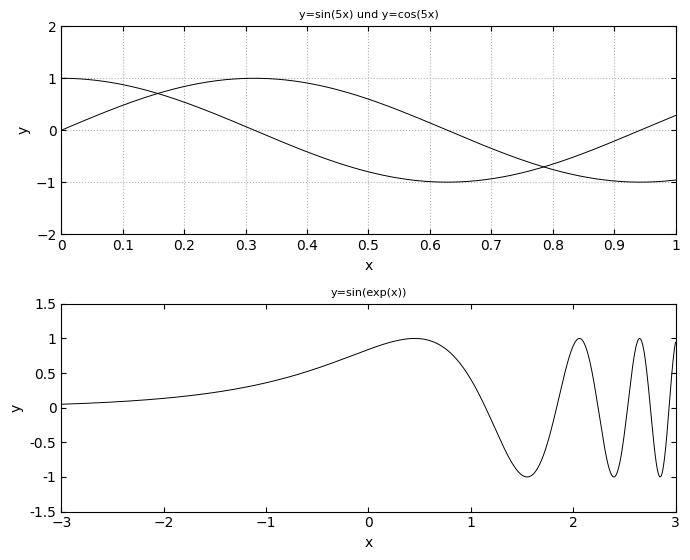

In [86]:
# Programmieraufgabe 1 c)
print()
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top']       = True
mpl.rcParams['ytick.right']     = True

# --- erstes Teilfenster: y = sin(5x) und y = cos(5x) --
plt.figure(figsize=(7,5.7))
plt.subplot(2, 1, 1)              # 2 Zeilen, 1 Spalte, Plot 1
x1 = np.linspace(0, 1, 500)
plt.plot(x1, np.sin(5*x1), 'black', lw=0.7)        # sin(5x)
plt.plot(x1, np.cos(5*x1), 'black', lw=0.7)        # cos(5x)
plt.title(r'y=sin(5x) und y=cos(5x)', fontsize=8)
plt.xlabel('x')
plt.xlim(0, 1)
labels = (0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)
plt.xticks(tuple(x*0.1 for x in range(0,11)), labels)    # 0,0.1,0.2,…,1.0
plt.ylabel('y')
plt.yticks(tuple(x for x in range(-2,4)))       # -2,-1,0,1,2
plt.grid(True, linestyle=':')        # gestricheltes Gitter
plt.ylim(-2,2)


# --- zweites Teilfenster: y = sin(exp(x)) ---
plt.subplot(2, 1, 2)              # 2 Zeilen, 1 Spalte, Plot 2
x2 = np.linspace(-3, 3, 1000)
plt.plot(x2, np.sin(np.exp(x2)), 'black', lw=0.7)
plt.title(r'y=sin(exp(x))', fontsize=8)
plt.xlabel('x')
plt.xlim(-3,3)
plt.xticks(tuple(x for x in range(-3,4)))       
plt.ylabel('y')
plt.ylim(-1.5, 1.5)                   
labels = (-1.5,-1,-0.5,0,0.5,1,1.5)
plt.yticks(tuple(x*0.1 for x in range(-15,16,5)), labels)   # 
plt.grid(False)

plt.tight_layout()  # Zwischenräume anpassen
plt.show()
